## STT: 68
## Họ và tên: Nguyễn Cao Thắng
## Lớp: IE224.P11
## Buổi  - Bài  - Lab 03
## Ghi chú, hoặc Lưu ý:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Model_Evaluation_V1.csv", header=0)

In [3]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,1,104,mazda,std,two,hatchback,fwd,front,93.1,0.764536,...,9.0,68.0,5000.0,31,38,6095,7.580645,Low,0,1
1,0,115,mazda,std,four,hatchback,fwd,front,98.8,0.854397,...,8.6,84.0,4800.0,26,32,11245,9.038462,Low,0,1
2,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,9.4,135.0,6000.0,16,23,15645,14.687500,Medium,0,1
3,0,102,subaru,std,four,sedan,fwd,front,97.2,0.826526,...,9.0,94.0,5200.0,26,32,9960,9.038462,Low,0,1
4,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,110.0,0.917347,...,21.5,123.0,4350.0,22,25,25552,10.681818,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,118,dodge,turbo,two,hatchback,fwd,front,93.7,0.755887,...,7.6,102.0,5500.0,24,30,7957,9.791667,Medium,0,1
196,1,128,nissan,std,two,sedan,fwd,front,94.5,0.794330,...,21.9,55.0,4800.0,45,50,7099,5.222222,Low,1,0
197,-1,74,volvo,turbo,four,wagon,rwd,front,104.3,0.907256,...,7.5,162.0,5100.0,17,22,18950,13.823529,High,0,1
198,-1,122,mercedes-benz,std,four,sedan,rwd,front,115.6,0.973570,...,8.3,155.0,4750.0,16,18,34184,14.687500,Medium,0,1


# Câu 1. Thực hiện phân tích thăm dò tìm ra các biến có khả năng ảnh hưởng nhất đến giá xe.

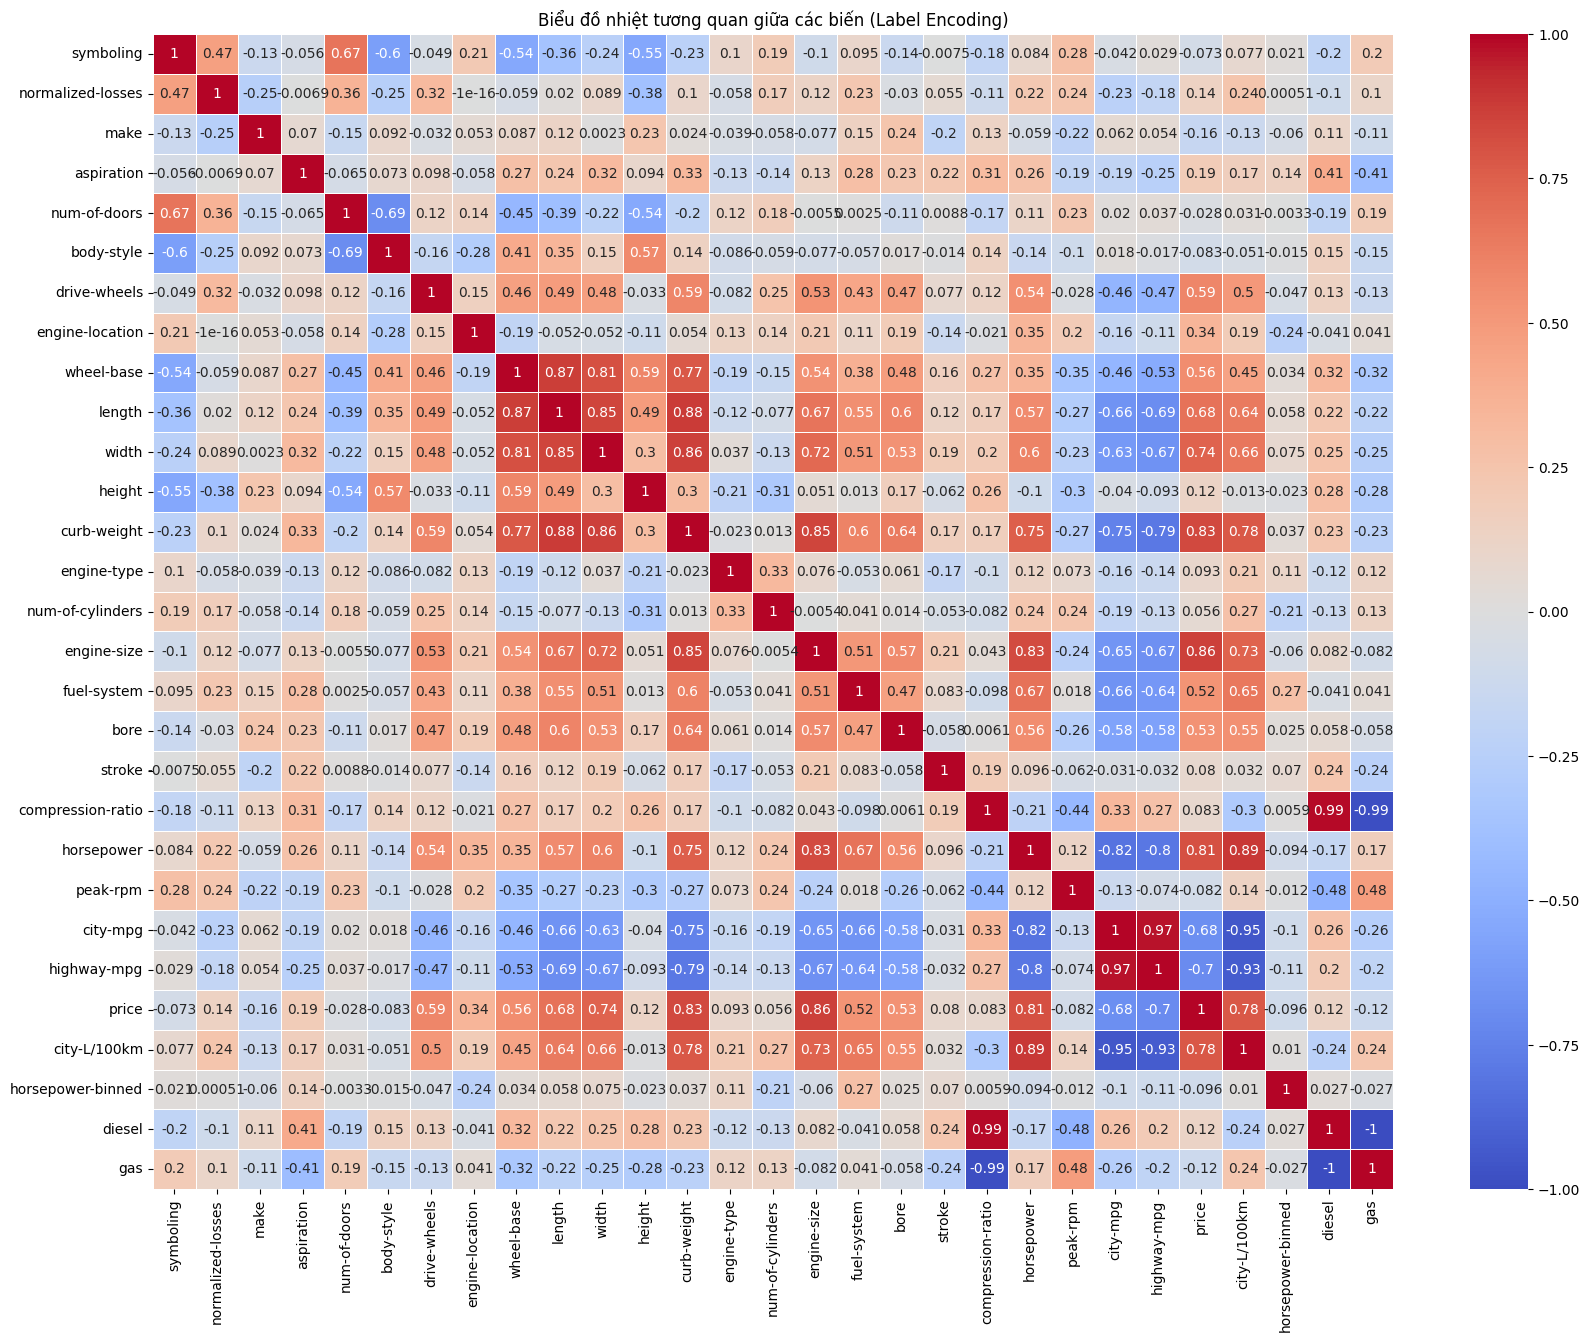

In [4]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một bản sao của dataframe để mã hóa
df_label_encoded = df.copy()

# Áp dụng Label Encoding cho các cột phân loại
label_encoders = {}
for column in df_label_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column])
    label_encoders[column] = le

# Tính toán ma trận tương quan
corr_matrix = df_label_encoded.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Biểu đồ nhiệt tương quan giữa các biến (Label Encoding)')
plt.show()

In [5]:
# In ra tương quan giữa price và các biến khác
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)

price                1.000000
engine-size          0.863675
curb-weight          0.828328
horsepower           0.805993
city-L/100km         0.780811
width                0.739666
length               0.675966
drive-wheels         0.587476
wheel-base           0.556307
bore                 0.533016
fuel-system          0.523768
engine-location      0.343934
aspiration           0.193892
normalized-losses    0.138304
diesel               0.119909
height               0.118563
engine-type          0.092536
compression-ratio    0.083241
stroke               0.079594
num-of-cylinders     0.055954
num-of-doors        -0.028228
symboling           -0.072984
peak-rpm            -0.081825
body-style          -0.083342
horsepower-binned   -0.095701
gas                 -0.119909
make                -0.159461
city-mpg            -0.682318
highway-mpg         -0.696474
Name: price, dtype: float64


<p> Kết luận:
Các biến có tương quan nhất với giá xe (price) là: <br> engine-size (0.863675) <br> curb-weight (0.828328)<br> horsepower (0.805993)<br> city-L/100km (0.780811)<br> width (0.739666)<br> length (0.675966)<br> drive-wheels (0.587476) <br> wheel-base (0.556307)<br> bore (0.533016) <br> fuel-system (0.523768) <br> city-mpg (-0.682318)<br> highway-mpg (-0.696474) </p>

# Câu 2. Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy tuyến tính đơn biến và đa biến. Đánh giá các mô hình bằng thang đo đã học.

## price & engine-size

In [6]:
# Hồi quy tuyến tính đơn biến price & engine_size
from sklearn.linear_model import LinearRegression
lr01 = LinearRegression()
X01 = df[['engine-size']] 
Y01 = df['price']
lr01.fit(X01, Y01)
Yhat01 = lr01.predict(X01)
print('Intercept: ', lr01.intercept_)
print('Coefficient: ', lr01.coef_)
print('price = ', lr01.intercept_, ' + ', lr01.coef_[0], ' * engine-size')

Intercept:  -8132.339640973618
Coefficient:  [168.29963198]
price =  -8132.339640973618  +  168.29963198359624  * engine-size


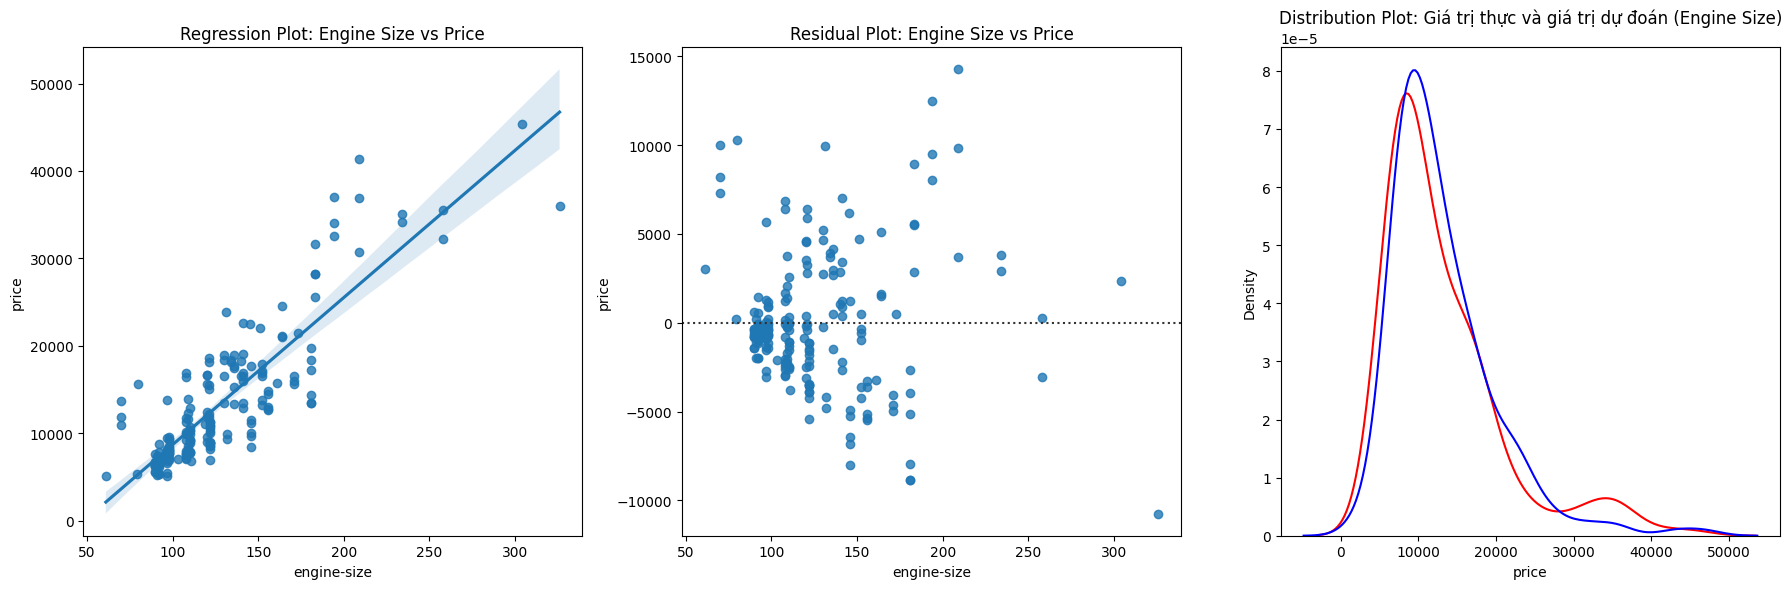

In [7]:
# Regression plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='engine-size', y='price', data=df, ax=axes[0])
axes[0].set_title('Regression Plot: Engine Size vs Price')

# Residual plot
sns.residplot(x='engine-size', y='price', data=df, ax=axes[1])
axes[1].set_title('Residual Plot: Engine Size vs Price')

# Distribution plot
ax01 = sns.kdeplot(df['price'], color='r', label='Actual Value', ax=axes[2])
sns.kdeplot(Yhat01, color='b', label='Fitted Values', ax=ax01)
axes[2].set_title('Distribution Plot: Giá trị thực và giá trị dự đoán (Engine Size)')

plt.tight_layout()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Regression Plot: Engine Size vs Price: Dữ liệu phân bố theo một đường thẳng, cho thấy mối quan hệ tuyến tính giữa engine size và price theo chiều dương.
# Residual Plot: Engine Size vs Price: Dữ liệu phân bố ngẫu nhiên xung quanh đường trung bình, không có mẫu nào ảnh hưởng nhiều đến mô hình.
# Distribution Plot: Giá trị thực và giá trị dự đoán (Engine Size): Dữ liệu phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

## price & curb-weight

In [8]:
# Hồi quy tuyến tính đơn biến price & engine_size
lr02 = LinearRegression()
X02 = df[['curb-weight']]
Y02 = df['price']
lr02.fit(X02, Y02)
Yhat02 = lr02.predict(X02)
print('Intercept: ', lr02.intercept_)
print('Coefficient: ', lr02.coef_)
print('price = ', lr02.intercept_, ' + ', lr02.coef_[0], ' * curb-weight')

Intercept:  -18905.463086418058
Coefficient:  [12.54394586]
price =  -18905.463086418058  +  12.543945862471752  * curb-weight


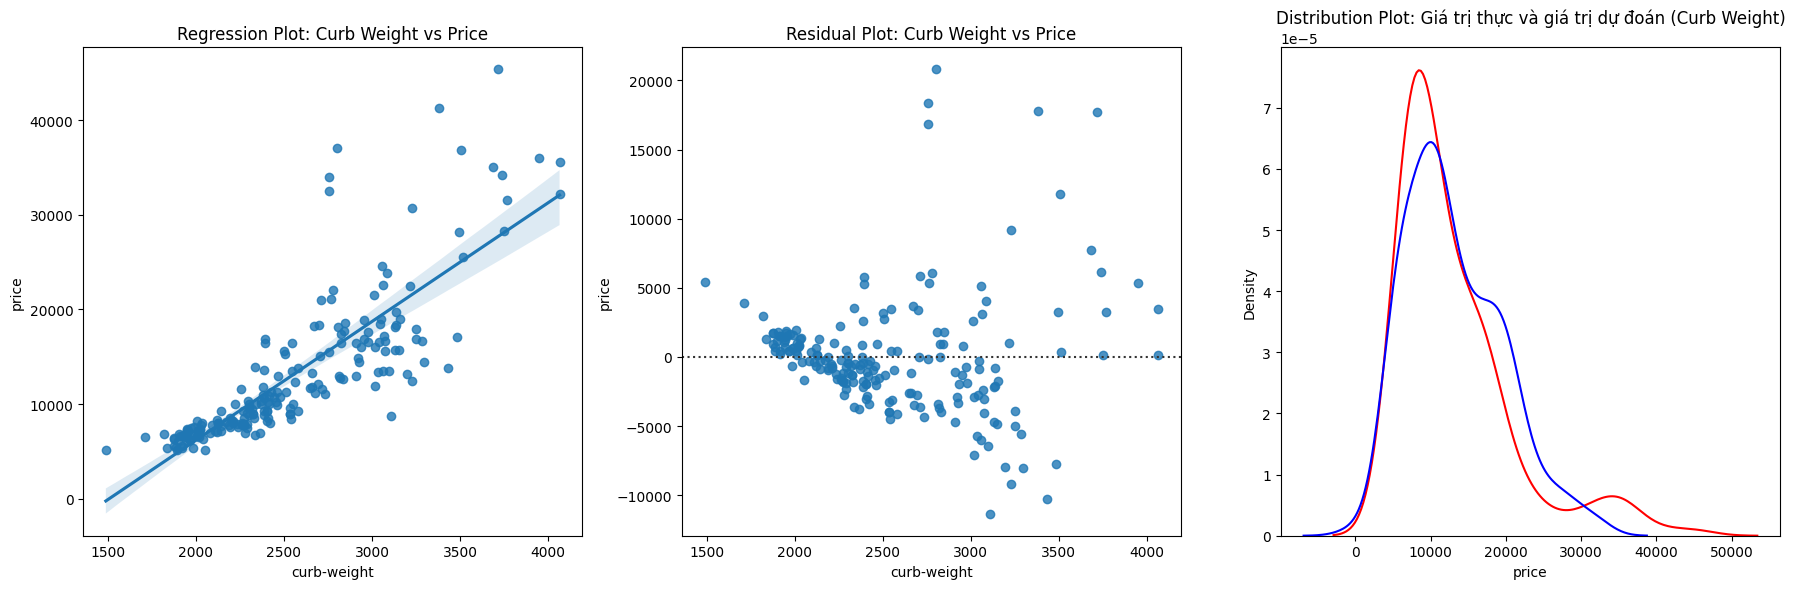

In [9]:
# Regression plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='curb-weight', y='price', data=df, ax=axes[0])
axes[0].set_title('Regression Plot: Curb Weight vs Price')

# Residual plot
sns.residplot(x='curb-weight', y='price', data=df, ax=axes[1])
axes[1].set_title('Residual Plot: Curb Weight vs Price')

# Distribution plot
ax02 = sns.kdeplot(df['price'], color='r', label='Actual Value', ax=axes[2])
sns.kdeplot(Yhat02, color='b', label='Fitted Values', ax=ax02)
axes[2].set_title('Distribution Plot: Giá trị thực và giá trị dự đoán (Curb Weight)')
plt.tight_layout()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Regression Plot: Engine Size vs Price: Dữ liệu phân bố theo một đường thẳng, cho thấy mối quan hệ tuyến tính giữa engine size và price theo chiều dương.
# Residual Plot: Engine Size vs Price: Dữ liệu phân bố ngẫu nhiên xung quanh đường trung bình, không có mẫu nào ảnh hưởng nhiều đến mô hình.
# Distribution Plot: Giá trị thực và giá trị dự đoán (Engine Size): Dữ liệu phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

## price & city-mpg

In [10]:
# Hồi quy tuyến tính đơn biến price & city-mpg
lr03 = LinearRegression()
X03 = df[['city-mpg']]
Y03 = df['price']
lr03.fit(X03, Y03)
Yhat03 = lr03.predict(X03)
print('Intercept: ', lr03.intercept_)
print('Coefficient: ', lr03.coef_)
print('price = ', lr03.intercept_, ' + ', lr03.coef_[0], ' * city-mpg')

Intercept:  33867.33784090609
Coefficient:  [-824.21132716]
price =  33867.33784090609  +  -824.2113271609308  * city-mpg


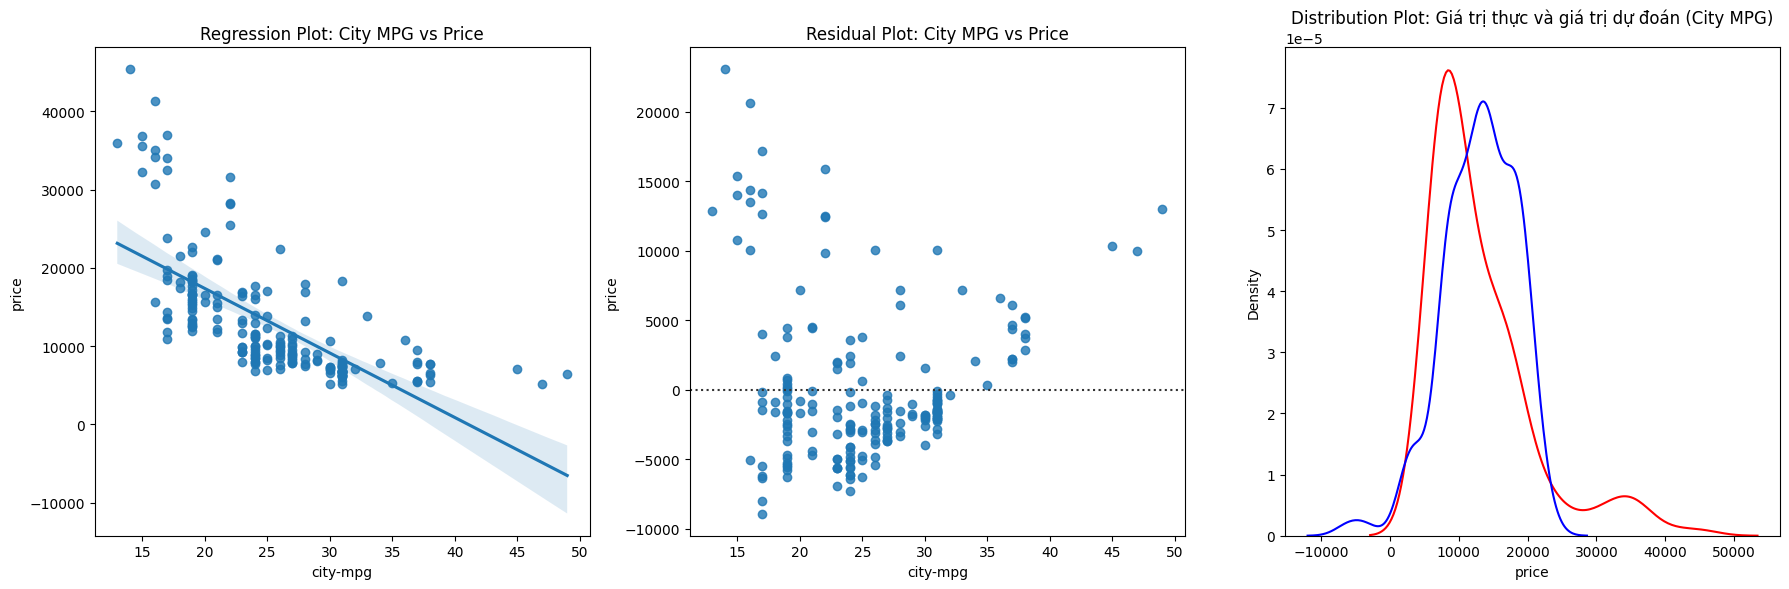

In [11]:
# Regression plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='city-mpg', y='price', data=df, ax=axes[0])
axes[0].set_title('Regression Plot: City MPG vs Price')

# Residual plot
sns.residplot(x='city-mpg', y='price', data=df, ax=axes[1])
axes[1].set_title('Residual Plot: City MPG vs Price')

# Distribution plot
ax03 = sns.kdeplot(df['price'], color='r', label='Actual Value', ax=axes[2])
sns.kdeplot(Yhat03, color='b', label='Fitted Values', ax=ax03)
axes[2].set_title('Distribution Plot: Giá trị thực và giá trị dự đoán (City MPG)')
plt.tight_layout()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Regression Plot: Engine Size vs Price: Dữ liệu phân bố theo một đường thẳng, cho thấy mối quan hệ tuyến tính giữa engine size và price theo chiều âm.
# Residual Plot: Engine Size vs Price: Dữ liệu phân bố ngẫu nhiên xung quanh đường trung bình, không có mẫu nào ảnh hưởng nhiều đến mô hình.
# Distribution Plot: Giá trị thực và giá trị dự đoán (Engine Size): Dữ liệu phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

## price && engine-size, curb-weight, city-mpg

In [12]:
# Hồi quy tuyến tính đa biến price & engine_size, curb-weight, city-mpg
lr04 = LinearRegression()
Z = df[['engine-size', 'curb-weight', 'city-mpg']]
lr04.fit(Z, df['price'])
Yhat04 = lr04.predict(Z)
print('Intercept: ', lr04.intercept_)
print('Coefficient: ', lr04.coef_)
print('price = ', lr04.intercept_, ' + ', lr04.coef_[0], ' * engine-size + ', lr04.coef_[1], ' * curb-weight + ', lr04.coef_[2], ' * city-mpg')

Intercept:  -6929.406616766728
Coefficient:  [ 110.31062138    3.87848227 -149.95424362]
price =  -6929.406616766728  +  110.31062138270632  * engine-size +  3.8784822658107068  * curb-weight +  -149.9542436235252  * city-mpg


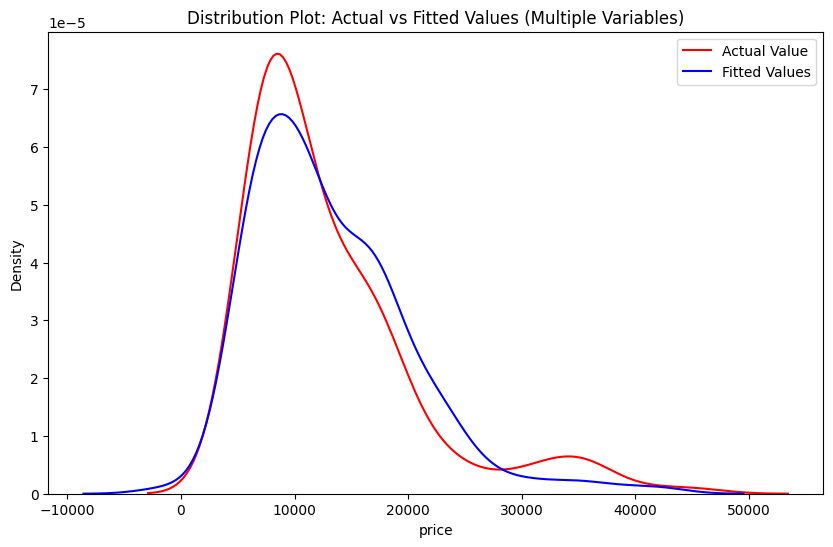

In [13]:
# Distribution plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(df['price'], color='r', label='Actual Value', ax=ax)
sns.kdeplot(Yhat04, color='b', label='Fitted Values', ax=ax)
ax.set_title('Distribution Plot: Actual vs Fitted Values (Multiple Variables)')
ax.legend()

plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Distribution Plot: Biểu đồ phân phối cho thấy giá trị thực và giá trị dự đoán phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

# Câu 3. Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy đa thức đơn biến. Đánh giá các mô hình bằng thang đo đã học.

## price & engine-size

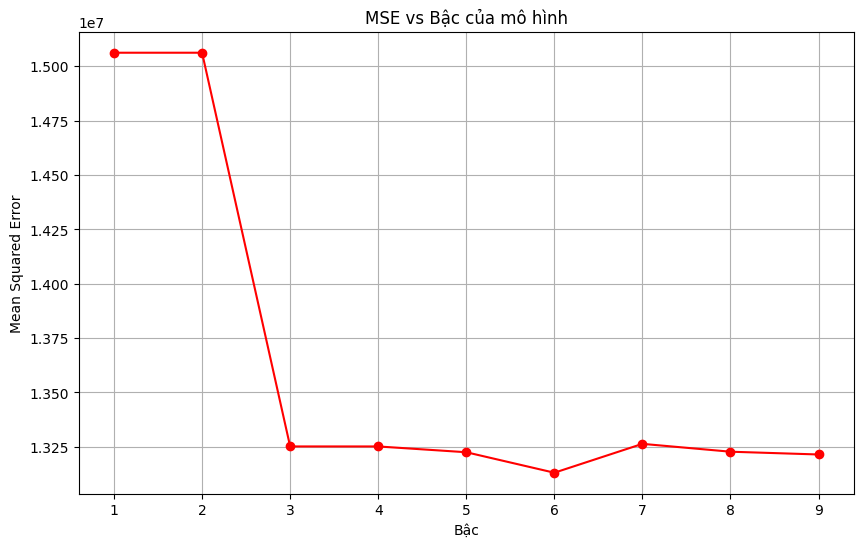

In [14]:
# Lựa chọn bậc của mô hình hồi quy đa thức
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def get_mse(degree, X, Y):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, Y)
    Yhat = lr.predict(X_poly)
    return mean_squared_error(Y, Yhat)

degrees01 = np.arange(1, 10)
mses01 = [get_mse(degree, X01, Y01) for degree in degrees01]

plt.figure(figsize=(10, 6))
plt.plot(degrees01, mses01, marker='o', color='r')
plt.title('MSE vs Bậc của mô hình')
plt.xlabel('Bậc')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa biến engine-size
scaler = StandardScaler()
X01_scaled = scaler.fit_transform(X01)

# Hồi quy đa thức bậc 6 giữa price & engine_size đã chuẩn hóa
poly1 = PolynomialFeatures(degree=6)
X01_poly_scaled = poly1.fit_transform(X01_scaled)
lr01_poly = LinearRegression()
lr01_poly.fit(X01_poly_scaled, Y01)
print('Intercept: ', lr01_poly.intercept_)
print('Coefficient: ', lr01_poly.coef_)
print('price = ', lr01_poly.intercept_, ' + ', lr01_poly.coef_[1], ' * engine-size + ', lr01_poly.coef_[2], ' * engine-size^2 + ', lr01_poly.coef_[3], ' * engine-size^3 + ', lr01_poly.coef_[4], ' * engine-size^4 + ', lr01_poly.coef_[5], ' * engine-size^5 + ', lr01_poly.coef_[6], ' * engine-size^6')

Intercept:  12376.37377842583
Coefficient:  [   0.         6709.04180419  656.51418321 -254.70234752  453.07272905
 -178.62133008   18.0876663 ]
price =  12376.37377842583  +  6709.041804194741  * engine-size +  656.514183211306  * engine-size^2 +  -254.7023475195196  * engine-size^3 +  453.072729049371  * engine-size^4 +  -178.6213300764802  * engine-size^5 +  18.087666295555785  * engine-size^6


Mean Squared Error (Polynomial Regression): 13127169.572799707
R^2 Score (Polynomial Regression): 0.7785770576416602


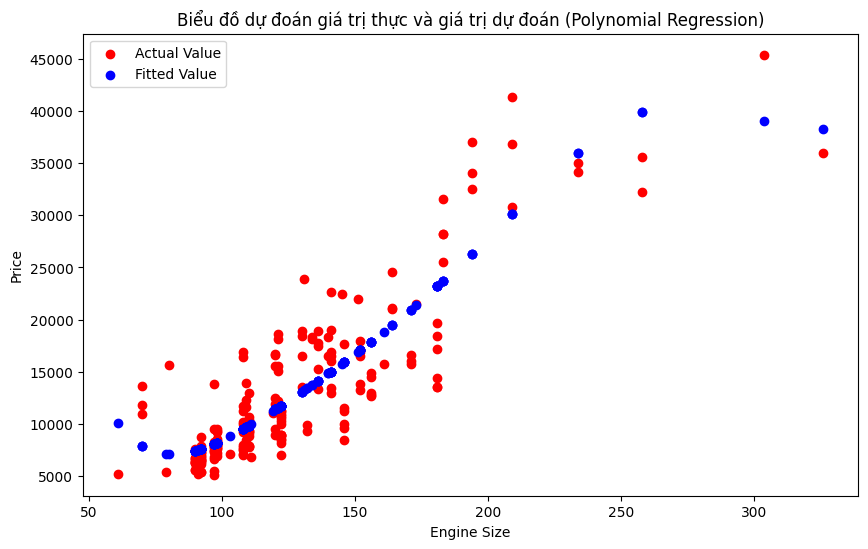

In [16]:
# Đánh giá mô hình hồi quy đa thức bậc 6 giữa price & engine_size
Yhat01_poly = lr01_poly.predict(X01_poly_scaled)
mse01_poly = mean_squared_error(Y01, Yhat01_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse01_poly}')

from sklearn.metrics import r2_score
r2_score01_poly = r2_score(Y01, Yhat01_poly)
print(f'R^2 Score (Polynomial Regression): {r2_score01_poly}')
# Chỉ số MSE và R^2 cho thấy mô hình hồi quy đa thức bậc 6 giữa price & engine_size đã chuẩn hóa là tốt.

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(X01, Y01, color='r', label='Actual Value')
plt.scatter(X01, Yhat01_poly, color='b', label='Fitted Value')
plt.title('Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression): Dữ liệu phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

## price & curb-weight

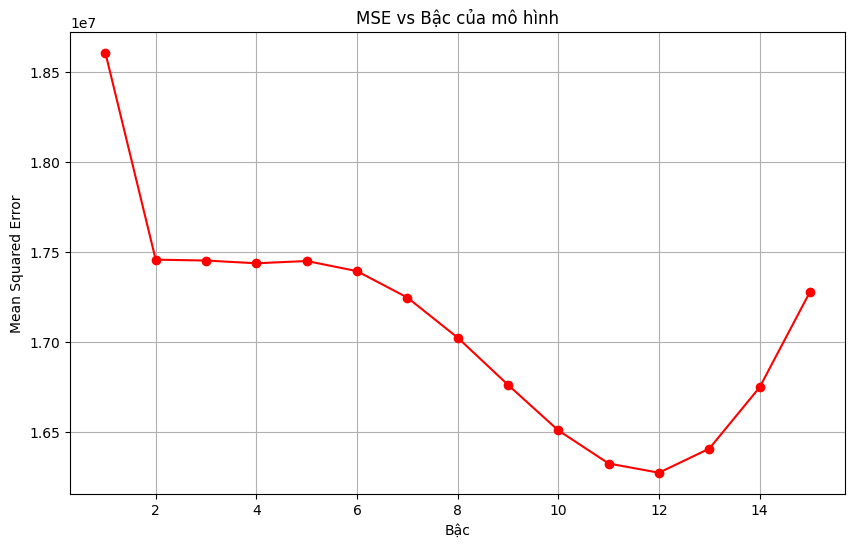

In [17]:
# Lựa chọn bậc của mô hình hồi quy đa thức
degrees02 = np.arange(1, 16)
mses02 = [get_mse(degree, X02, Y02) for degree in degrees02]

plt.figure(figsize=(10, 6))
plt.plot(degrees02, mses02, marker='o', color='r')
plt.title('MSE vs Bậc của mô hình')
plt.xlabel('Bậc')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [18]:
# Chuẩn hóa biến curb-weight
X02_scaled = scaler.fit_transform(X02)

# Hồi quy đa thức bậc 12 giữa price & curb-weight đã chuẩn hóa
poly2 = PolynomialFeatures(degree=12)
X02_poly_scaled = poly2.fit_transform(X02_scaled)
lr02_poly = LinearRegression()
lr02_poly.fit(X02_poly_scaled, Y02)
print('Intercept: ', lr02_poly.intercept_)
print('Coefficient: ', lr02_poly.coef_)
print('price = ', lr02_poly.intercept_, ' + ', lr02_poly.coef_[1], ' * curb-weight + ', lr02_poly.coef_[2], ' * curb-weight^2 + ', lr02_poly.coef_[3], ' * curb-weight^3 + ', lr02_poly.coef_[4], ' * curb-weight^4 + ', lr02_poly.coef_[5], ' * curb-weight^5 + ', lr02_poly.coef_[6], ' * curb-weight^6 + ', lr02_poly.coef_[7], ' * curb-weight^7 + ', lr02_poly.coef_[8], ' * curb-weight^8 + ', lr02_poly.coef_[9], ' * curb-weight^9 + ', lr02_poly.coef_[10], ' * curb-weight^10 + ', lr02_poly.coef_[11], ' * curb-weight^11 + ', lr02_poly.coef_[12], ' * curb-weight^12')

Intercept:  12876.966329200604
Coefficient:  [     0.          12129.28326015   4845.03509475 -15874.07591762
 -11405.90843997  13402.46227994   7321.9487234   -5894.81938631
  -1543.84757882   1339.79050436     23.09997378   -118.57705118
     16.91730012]
price =  12876.966329200604  +  12129.283260145427  * curb-weight +  4845.035094751761  * curb-weight^2 +  -15874.07591761625  * curb-weight^3 +  -11405.908439972141  * curb-weight^4 +  13402.462279944055  * curb-weight^5 +  7321.948723399012  * curb-weight^6 +  -5894.8193863090355  * curb-weight^7 +  -1543.847578824743  * curb-weight^8 +  1339.7905043609885  * curb-weight^9 +  23.099973780803726  * curb-weight^10 +  -118.57705117815267  * curb-weight^11 +  16.91730011894692  * curb-weight^12


Mean Squared Error (Polynomial Regression): 14940121.407436214
R^2 Score (Polynomial Regression): 0.7479970360038692


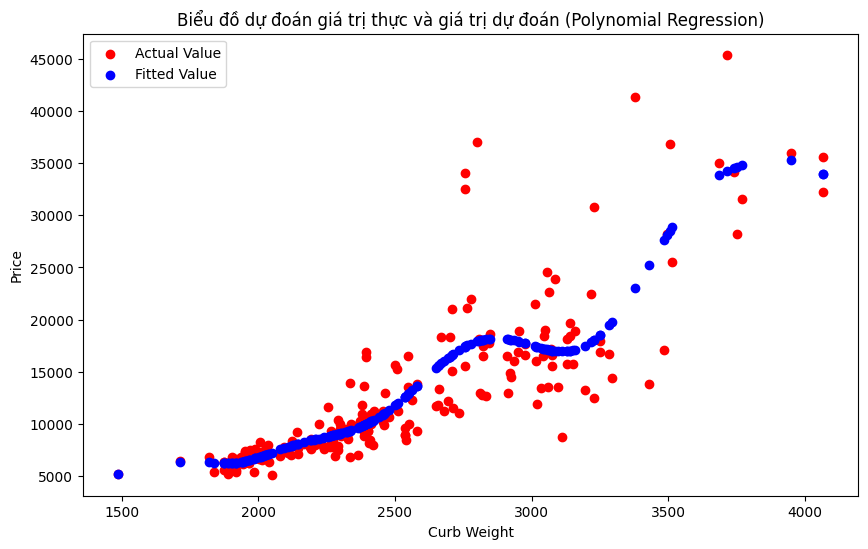

In [19]:
# Đánh giá mô hình hồi quy đa thức bậc 12 giữa price & curb-weight
Yhat02_poly = lr02_poly.predict(X02_poly_scaled)
mse02_poly = mean_squared_error(Y02, Yhat02_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse02_poly}')

r2_score02_poly = r2_score(Y02, Yhat02_poly)
print(f'R^2 Score (Polynomial Regression): {r2_score02_poly}')
# Chỉ số MSE và R^2 cho thấy mô hình hồi quy đa thức bậc 12 giữa price & curb-weight đã chuẩn hóa là tốt.

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(X02, Y02, color='r', label='Actual Value')
plt.scatter(X02, Yhat02_poly, color='b', label='Fitted Value')
plt.title('Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression)')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.legend()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression): Dữ liệu phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

## price & city-mpg

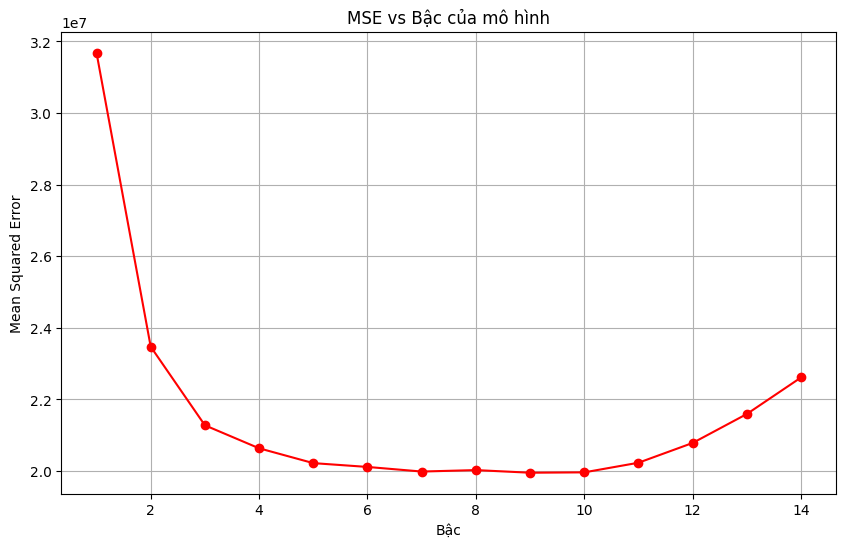

In [20]:
# Lựa chọn bậc của mô hình hồi quy đa thức
degrees03 = np.arange(1, 15)
mses03 = [get_mse(degree, X03, Y03) for degree in degrees03]

plt.figure(figsize=(10, 6))
plt.plot(degrees03, mses03, marker='o', color='r')
plt.title('MSE vs Bậc của mô hình')
plt.xlabel('Bậc')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [21]:
# Chuẩn hóa biến city-mpg
X03_scaled = scaler.fit_transform(X03)

# Hồi quy đa thức bậc 7 giữa price & city-mpg đã chuẩn hóa
poly3 = PolynomialFeatures(degree=7)
X03_poly_scaled = poly3.fit_transform(X03_scaled)
lr03_poly = LinearRegression()
lr03_poly.fit(X03_poly_scaled, Y03)
print('Intercept: ', lr03_poly.intercept_)
print('Coefficient: ', lr03_poly.coef_)
print('price = ', lr03_poly.intercept_, ' + ', lr03_poly.coef_[1], ' * city-mpg + ', lr03_poly.coef_[2], ' * city-mpg^2 + ', lr03_poly.coef_[3], ' * city-mpg^3 + ', lr03_poly.coef_[4], ' * city-mpg^4 + ', lr03_poly.coef_[5], ' * city-mpg^5 + ', lr03_poly.coef_[6], ' * city-mpg^6 + ', lr03_poly.coef_[7], ' * city-mpg^7')

Intercept:  11264.573729080645
Coefficient:  [    0.         -4209.31416015  -557.97457965 -1003.82339939
  1893.83964087  -265.92933397  -179.47697022    37.82402281]
price =  11264.573729080645  +  -4209.3141601477555  * city-mpg +  -557.9745796501668  * city-mpg^2 +  -1003.823399385849  * city-mpg^3 +  1893.8396408710394  * city-mpg^4 +  -265.9293339684329  * city-mpg^5 +  -179.47697022312013  * city-mpg^6 +  37.82402280941763  * city-mpg^7


Mean Squared Error (Polynomial Regression): 19986965.68203349
R^2 Score (Polynomial Regression): 0.6628692327323116


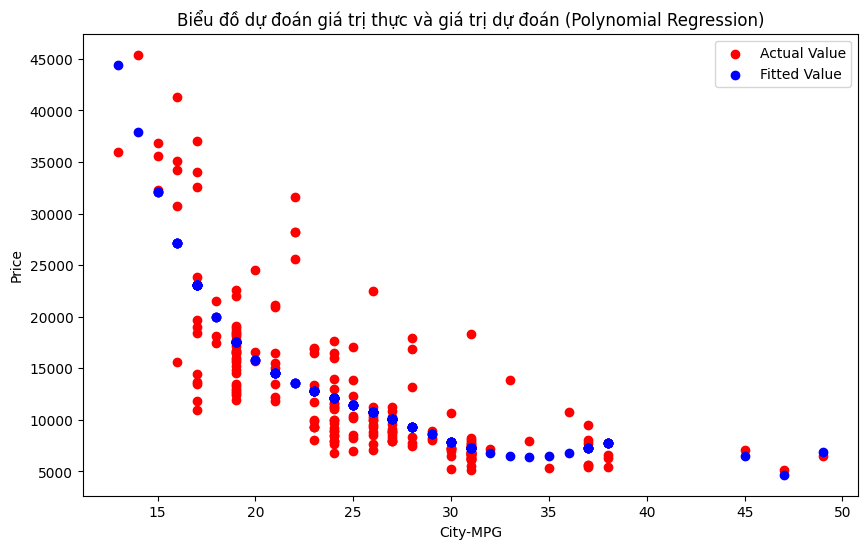

In [22]:
# Đánh giá mô hình hồi quy đa thức bậc 7 giữa price & city-mpg
Yhat03_poly = lr03_poly.predict(X03_poly_scaled)
mse03_poly = mean_squared_error(Y03, Yhat03_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse03_poly}')

r2_score03_poly = r2_score(Y03, Yhat03_poly)
print(f'R^2 Score (Polynomial Regression): {r2_score03_poly}')
# Chỉ số MSE và R^2 cho thấy mô hình hồi quy đa thức bậc 7 giữa price & city-mpg đã chuẩn hóa là tốt.

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(X03, Y03, color='r', label='Actual Value')
plt.scatter(X03, Yhat03_poly, color='b', label='Fitted Value')
plt.title('Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression)')
plt.xlabel('City-MPG')
plt.ylabel('Price')
plt.legend()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression): Dữ liệu phân bố khá giống nhau, cho thấy mô hình dự đoán tương đối tốt.

# Câu 4. Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy đa thức nhiều biến. Đánh giá các mô hình bằng thang đo đã học. 

## price & engine_size, curb-weight, city-mpg

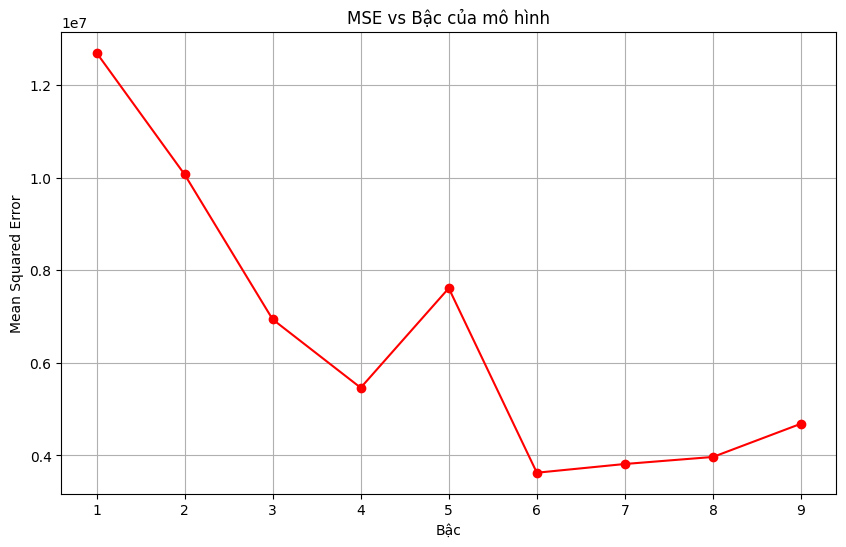

In [23]:
# Chọn bậc của mô hình hồi quy đa thức
degrees04 = np.arange(1, 10)
mses04 = [get_mse(degree, Z, df['price']) for degree in degrees04]

plt.figure(figsize=(10, 6))
plt.plot(degrees04, mses04, marker='o', color='r')
plt.title('MSE vs Bậc của mô hình')
plt.xlabel('Bậc')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [24]:
# Chuẩn hóa biến engine-size, curb-weight, city-mpg
Z_scaled = scaler.fit_transform(Z)

# Hồi quy đa thức bậc 6 giữa price & engine-size, curb-weight, city-mpg đã chuẩn hóa
poly4 = PolynomialFeatures(degree=6)
Z_poly_scaled = poly4.fit_transform(Z_scaled)
lr04_poly = LinearRegression()
lr04_poly.fit(Z_poly_scaled, df['price'])
print('Intercept: ', lr04_poly.intercept_)
print('Coefficient: ', lr04_poly.coef_)

Intercept:  -2310202054866.4697
Coefficient:  [ 2.31020206e+12  4.79690857e+03  1.57513619e+03  6.59445004e+03
  3.28480695e+04 -4.43296655e+04  1.46410538e+04  2.33743838e+04
  3.81536920e+03  8.84680427e+03 -1.97551427e+04  1.56759017e+04
 -5.80482953e+04 -4.28421979e+04  2.67110268e+04 -2.18982539e+04
  3.21633826e+04 -1.08677977e+04 -1.19285688e+04 -1.86407065e+04
 -1.90845595e+05  4.59548544e+05 -2.66348122e+05 -5.30409250e+05
  3.75187738e+05 -1.55828957e+05  3.49097737e+05 -1.23268066e+05
  1.87493182e+05 -2.78020401e+04 -9.85420734e+04  4.12400075e+03
 -8.58084311e+03  5.43951085e+04  7.00670057e+03 -1.60019716e+05
  4.44567275e+05 -4.55312025e+05 -4.93187910e+05  1.10596625e+06
 -3.18921411e+05  3.47671409e+05 -7.64251712e+05  8.16738221e+05
  1.31575729e+04 -1.33507080e+05  1.88046404e+05 -4.77436536e+05
  1.23149392e+05  3.58990113e+04  8.91355192e+03 -9.94564393e+03
  9.82044255e+04 -1.45468337e+04  2.57459429e+04  1.47826308e+04
 -2.69940377e+04  5.76314428e+04 -2.22099457

Mean Squared Error (Polynomial Regression): 2121653.9563367115
R^2 Score (Polynomial Regression): 0.9642129356924203


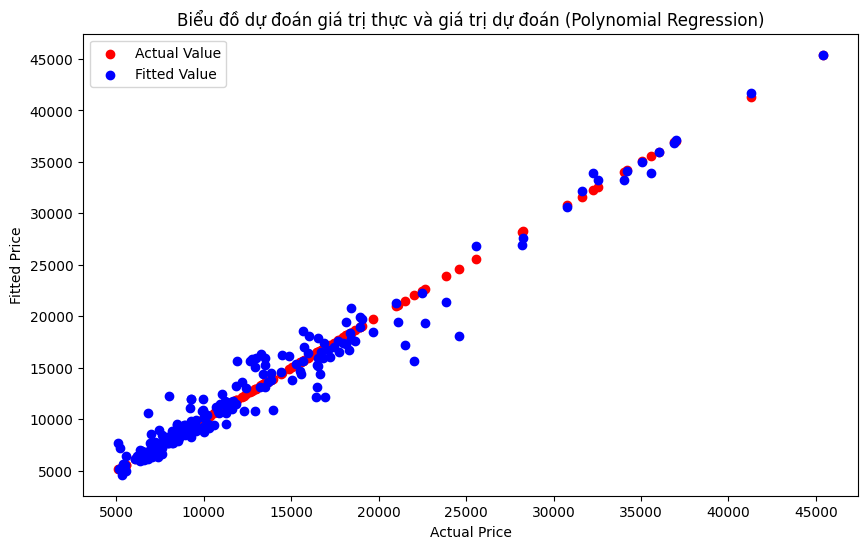

In [30]:
# Đánh giá mô hình hồi quy đa thức bậc 6 giữa price & engine-size, curb-weight, city-mpg
Yhat04_poly = lr04_poly.predict(Z_poly_scaled)
mse04_poly = mean_squared_error(df['price'], Yhat04_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse04_poly}')

r2_score04_poly = r2_score(df['price'], Yhat04_poly)
print(f'R^2 Score (Polynomial Regression): {r2_score04_poly}')
# Chỉ số MSE và R^2 cho thấy mô hình hồi quy đa thức bậc 6 giữa price & engine-size, curb-weight, city-mpg đã chuẩn hóa là rất tốt.

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['price'], color='r', label='Actual Value')
plt.scatter(df['price'], Yhat04_poly, color='b', label='Fitted Value')
plt.title('Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Fitted Price')
plt.legend()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression): Dữ liệu phân bố rất giống nhau, cho thấy mô hình dự đoán rất tốt.

## Câu 5. Chọn các biến có khả năng ảnh hưởng nhất đến giá xe xây dựng mô hình hồi quy phù hợp cho bộ dữ liệu để dự đoán giá xe.

<p> Nhận thấy trong các mô hình đã thử ở trên, mô hình hồi quy đa thức nhiều biến có chỉ số MSE thấp và R-squared cao nhất, ta chọn mô hình này để xây dựng hồi quy phù hợp để dự đoán giá xe <p>
<p> Các biến được lựa chọn có coordinate > +-0.5 đối với price dựa theo kết quả được tính từ câu 1, bao gồm engine-size, curb-weight, horsepower, city-L/100km, width, length, drive-wheels, wheel-base, bore, fuel-system, city-mpg, highway-mpg </p>

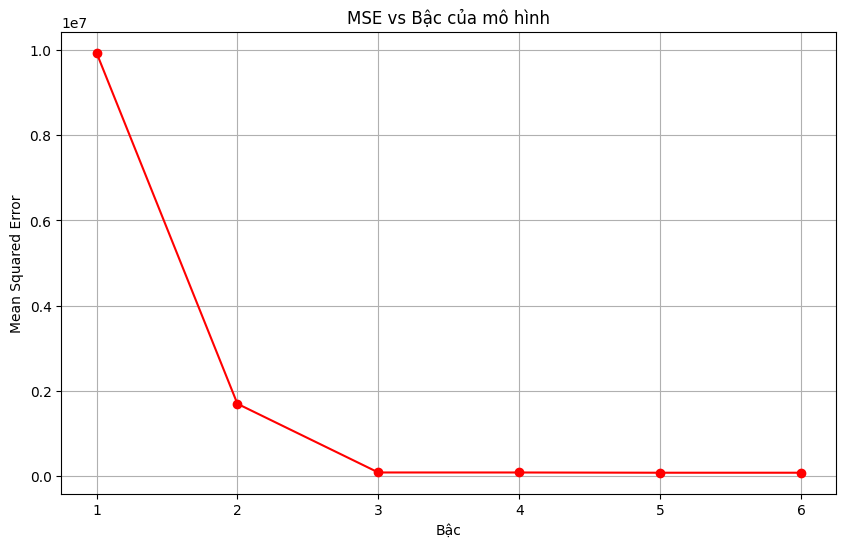

In [26]:
# Chọn các cột mong muốn từ DataFrame df
coordinated_columns = ['engine-size', 'curb-weight', 'horsepower', 'city-L/100km', 'width', 'length', 'drive-wheels', 'wheel-base', 'bore', 'fuel-system', 'city-mpg', 'highway-mpg']
df_selected = df_label_encoded[coordinated_columns]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected)

# Chọn bậc của mô hình hồi quy đa thức
degrees05 = np.arange(1, 7)
mses05 = [get_mse(degree, df_selected_scaled, df['price']) for degree in degrees05]

plt.figure(figsize=(10, 6))
plt.plot(degrees05, mses05, marker='o', color='r')
plt.title('MSE vs Bậc của mô hình')
plt.xlabel('Bậc')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [27]:
# Hồi quy đa thức bậc 3 giữa price & các biến đã chuẩn hóa
poly5 = PolynomialFeatures(degree=3)
df_selected_poly_scaled = poly5.fit_transform(df_selected_scaled)
lr05_poly = LinearRegression()
lr05_poly.fit(df_selected_poly_scaled, df['price'])
print('Intercept: ', lr05_poly.intercept_)
print('Coefficient: ', lr05_poly.coef_)

Intercept:  20039.89022128554
Coefficient:  [ 9.31538864e-07  1.07081652e+05 -1.28784290e+05  1.99242521e+03
  2.20601883e+04  1.31548118e+05 -2.64695791e+04  5.85376394e+04
  5.49844205e+04 -4.01179685e+04 -3.99388594e+04 -1.52500427e+04
 -5.27603275e+04  9.21309157e+04 -2.46216592e+05  2.86214961e+04
  3.91029722e+03 -1.40302980e+04  8.02989314e+04 -6.40370501e+03
  1.94839492e+04 -8.01682638e+04 -3.66051253e+04 -2.41928653e+04
 -7.15665727e+03  3.16550217e+05 -1.46528078e+05  5.98709537e+04
  3.14432213e+04 -1.14658934e+05 -2.81310570e+05 -1.31207616e+05
  1.27638093e+05  4.49741738e+04 -5.58888749e+04  6.05039914e+04
  5.24633044e+04  1.00206179e+04  1.91283599e+04  2.85633653e+04
 -1.61738931e+03  1.33254429e+05  1.01844323e+05 -6.21916297e+04
 -6.62644439e+03  5.30736401e+04  2.20281620e+04 -4.16978124e+04
 -2.49348100e+04  1.93266265e+04 -1.65852025e+04  3.04729208e+03
  3.37374911e+04 -2.65873761e+04  4.05864317e+04 -1.64259136e+04
  2.24552119e+04  1.02244817e+04 -1.01963652e+

Mean Squared Error (Polynomial Regression): 86033.01252370751
R^2 Score (Polynomial Regression): 0.9985488354768858


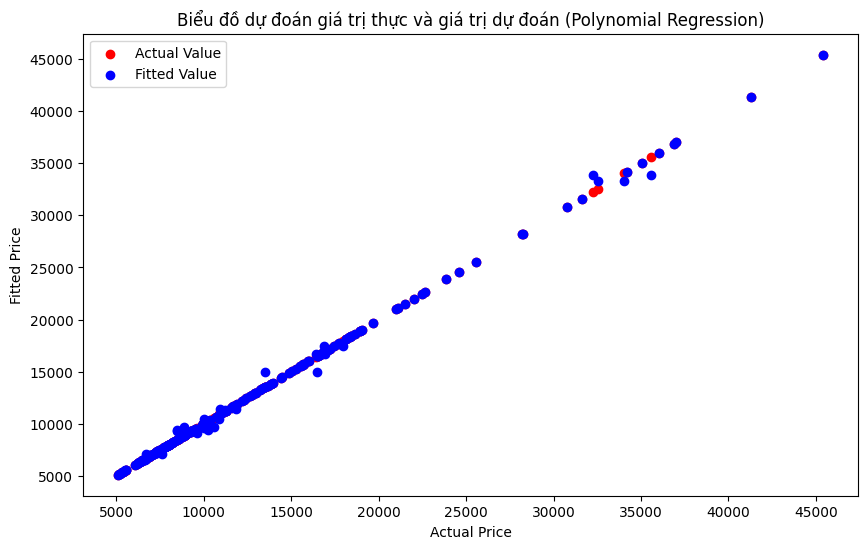

In [29]:
# Đánh giá mô hình hồi quy đa thức bậc 3 giữa price & các biến
Yhat05_poly = lr05_poly.predict(df_selected_poly_scaled)
mse05_poly = mean_squared_error(df['price'], Yhat05_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse05_poly}')

r2_score05_poly = r2_score(df['price'], Yhat05_poly)
print(f'R^2 Score (Polynomial Regression): {r2_score05_poly}')
# Chỉ số MSE và R^2 cho thấy mô hình hồi quy đa thức bậc 3 giữa price & các biến đã chuẩn hóa là rất tốt.

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['price'], color='r', label='Actual Value')
plt.scatter(df['price'], Yhat05_poly, color='b', label='Fitted Value')
plt.title('Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Fitted Price')
plt.legend()
plt.show()

# Đánh giá mô hình dựa trên biểu đồ:
# Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression): Dữ liệu phân bố rất giống nhau, cho thấy mô hình dự đoán rất tốt.